<center><h1>U.S. Airline Traffic Data</h1></center>

### Overall Strategy
1. Define the research query 
2. Gather pertinent data Transform the research question into a mathematical problem
3. Choose a suitable model and evaluate his performance  
4. Select an appropriate model  
5. Execute the analysis 
7. Derive conclusions based on the findings

### Research question
* How accurately can we predict the number of domestic flights lost after the pandemic,and what is the monthly rate recovery until now ?

### Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from itertools import chain 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

### Import data

In [2]:
df = pd.read_csv('air traffic.csv')
df

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023,5,"71,423,653","10,358,666","81,782,319","667,331","71,924","739,255","66,743,565","26,805,432","93,548,998","77,821,407","31,950,687","109,772,094",85.77,83.90,85.22
245,2023,6,"72,482,621","11,544,505","84,027,126","661,293","75,279","736,572","68,789,127","29,883,465","98,672,591","78,058,358","33,410,671","111,469,028",88.13,89.44,88.52
246,2023,7,"75,378,157","12,432,615","87,810,772","684,939","79,738","764,677","72,267,904","31,376,000","103,643,904","81,986,010","35,326,191","117,312,202",88.15,88.82,88.35
247,2023,8,"71,477,988","11,572,149","83,050,137","691,482","77,137","768,619","67,933,484","29,938,507","97,871,992","81,997,399","34,908,793","116,906,192",82.85,85.76,83.72


### check type and missing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


**Data types (Dtype)**: It shows the data type of each column in the DataFrame.It will indicate whether a column contains integers, floats, strings, or other data types.

**Non-null counts**: It displays the number of non-null (non-missing) values for each column. This information is helpful to identify missing data.

**Memory usage**: It provides an estimate of the memory usage of the DataFrame. This can be useful for assessing the memory footprint of your data.


In [4]:
df.describe()

,Year,Month,Dom_LF,Int_LF,LF
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2012.879518,6.445783,79.938394,77.304940,79.286305
std,6.002817,3.442803,8.860562,10.907145,8.895700
min,2003.000000,1.000000,13.090000,23.150000,13.830000
25%,2008.000000,3.000000,77.720000,76.430000,76.940000
50%,2013.000000,6.000000,82.120000,79.910000,81.580000
75%,2018.000000,9.000000,85.240000,82.930000,84.070000
max,2023.000000,12.000000,89.960000,89.440000,89.140000


This summary provides a quick overview of the distribution of numerical data in the DataFrame, helping you to understand the central tendency and spread of the data

### check for duplicated rows

In [5]:
duplicated_rows = df[df.duplicated()]

if not duplicated_rows.empty:
    print("There are duplicated rows.")
    print(duplicated_rows)
else:
    print("There are no duplicated rows.")


There are no duplicated rows.


### Draw Data 


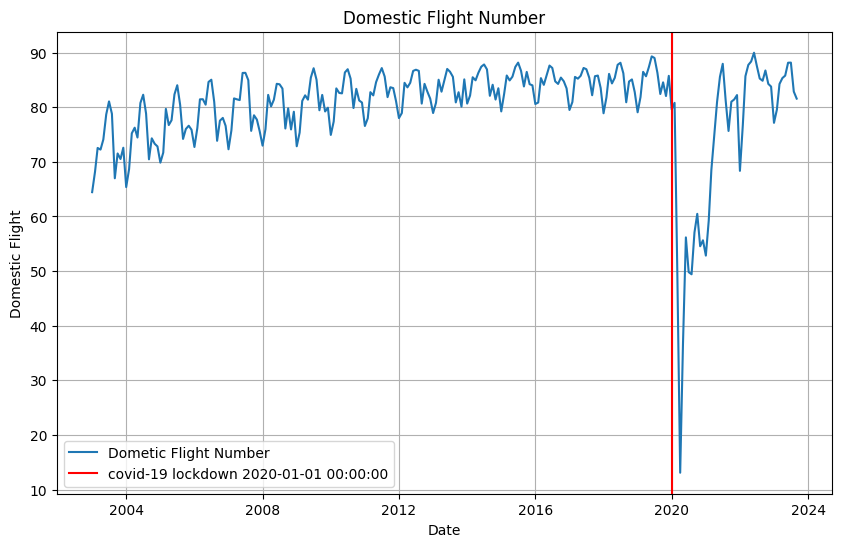

In [6]:
#create a date column
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

#lockdown start date
lockdown_date = pd.Timestamp('2020-01-01')

#plot with matplotlib
plt.figure(figsize =(10,6)) 
plt.plot(df['date'],df['Dom_LF'], label ='Dometic Flight Number' )
plt.axvline(lockdown_date, color = 'r', label = f'covid-19 lockdown {lockdown_date}')
plt.title('Domestic Flight Number')
plt.xlabel('Date')
plt.ylabel('Domestic Flight')
plt.grid(True)
plt.legend()
plt.show()


### Midpoint Adjustment:

In [7]:
df['time'] = (df.index.values + 0.5) / 12

The addition of 0.5 before dividing by 12 suggests a midpoint adjustment. This adjustment is often used when working with discrete time intervals, such as months. By adding 0.5, you shift the values to the middle of the month before converting to a different time scale (dividing by 12).

### Build a Model

In time series analysis, we often decompose a time series into its individual components to better understand the underlying patterns. This decomposition model can be expresse as:
$ \ Y_i = F(t_i) + S_i + R_i \ $

**trend component** $\ F(t_i) \$ : 

The trend component captures the long-term pattern or underlying trend in the time series data. It helps us understand the overall direction of the series.

**seasonal component** $\ S_i \$ : 

The seasonal component represents the periodic or repeating patterns in the data that occur at fixed intervals. It accounts for seasonality, such as daily, weekly, or yearly patterns.

**seasonal component** $\ R_i \$ : 

The residual component represents the remaining variation in the time series after removing the trend and seasonal components. Ideally, this should behave like a stationary time series with white noise characteristics $\ W(0, \sigma) \$

**Goal of the Decomposition**: 

By decomposing the time series, we aim to analyze and interpret each component separately. The ultimate goal is often to model and remove the trend and seasonality, leaving behind a residual component that ideally exhibits white noise properties.

This decomposition approach is valuable for various time series analysis tasks, including forecasting, anomaly detection, and gaining insights into the underlying dynamics of the data.

ign}
$

### Number of Domestic Flight before lockdown

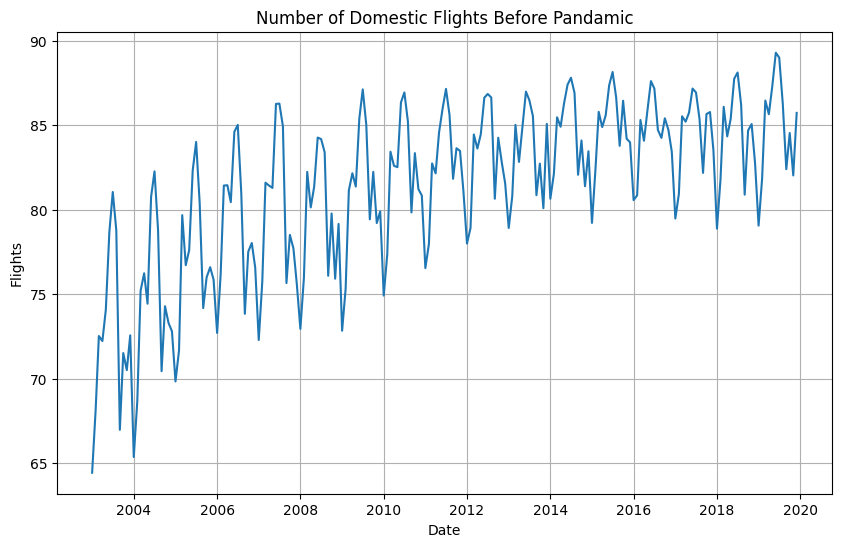

In [8]:

# create dataframe before lockdown
df_normal_times = df[df['date'] <lockdown_date]

#plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_normal_times['date'], df_normal_times['Dom_LF'])
plt.grid(True)
plt.title('Number of Domestic Flights Before Pandamic')
plt.xlabel('Date')
plt.ylabel('Flights')
plt.show()

### divide data into train and test 

In [9]:
#convert date to numeric values
x = list(df_normal_times['time'])
y = list(df_normal_times['Dom_LF'])

#divide data into training and test data
train_size = int(len(x)*0.8)
test_size = len(x) - train_size 

#train data 80 %
x_train = x[0:train_size]
y_train = y[0:train_size]

#test data 20 %
x_test = x[train_size:]
y_test = y[train_size:]

Dom_LF_test = df_normal_times.iloc[train_size:].copy()
Dom_LF_train = df_normal_times.iloc[0:train_size].copy()

### display scatter data

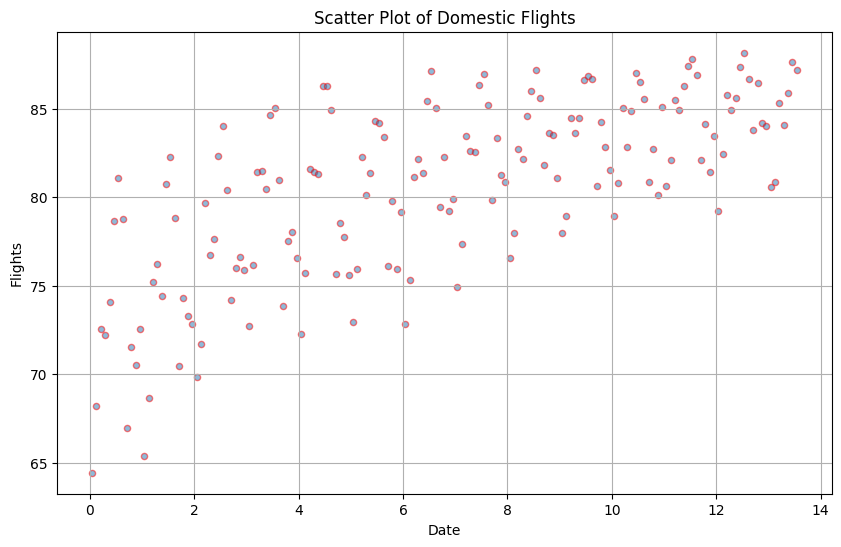

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, s=20, alpha=0.5, edgecolors="red")
plt.xlabel('Date')
plt.ylabel('Flights')
plt.title('Scatter Plot of Domestic Flights')
plt.grid(True)
plt.show()


### Trend component $\ F(t_i) \$ 
#### Linear trend 

The linear model is F(t) = 0.902*t + 74.370 


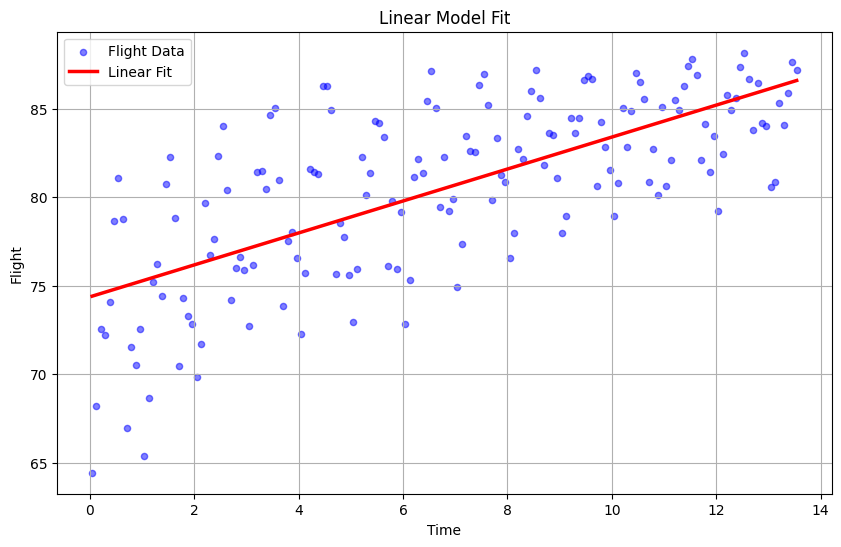

In [12]:
# fit model with training data
model = LinearRegression().fit(np.array(x_train).reshape(-1, 1),y_train)
coefficients = [model.coef_[0],model.intercept_]
print("The linear model is F(t) = {:.3f}*t + {:.3f} ".format(coefficients[0],coefficients[1]))
linear = model.predict(np.array(x_train).reshape(-1, 1))

# plot data with matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, s=20, c="blue", alpha=0.5, label="Flight Data")
plt.plot(x_train, linear, color="red", linewidth=2.5, label="Linear Fit")
plt.xlabel('Time')
plt.ylabel('Flight')
plt.title('Linear Model Fit')
plt.legend()
plt.grid(True)
plt.show()

### residual of the Linear Model

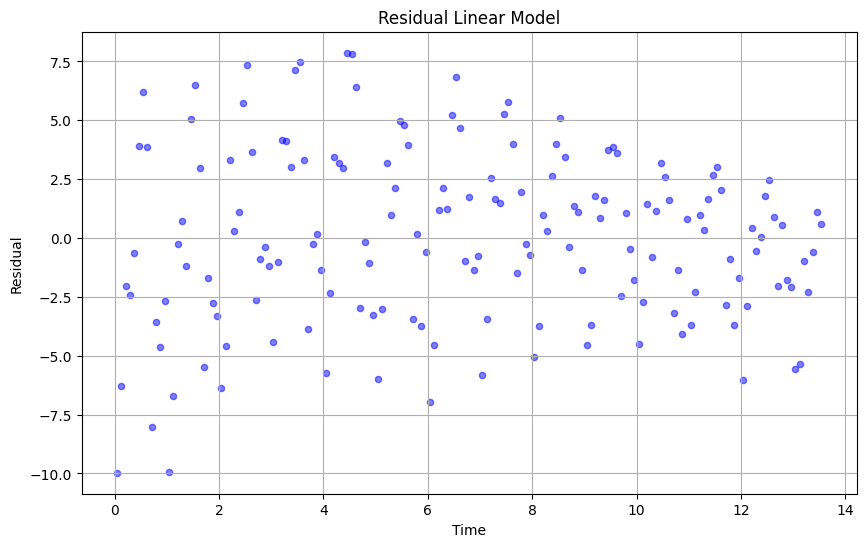

In [13]:
plt.figure (figsize =(10, 6))
plt.scatter(x_train, y_train - linear, s=20, c="blue", alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Residual')
plt.title('Residual Linear Model')
plt.grid(True)
plt.show()

$$Y_i = F(t_i) + R_i + S_i $$
$$R_i = Y_i - (F(t_i) + S_i)$$
**interpretation** :
Examining the residuals helps validate the effectiveness of your decomposition model. If the model is appropriate, the residuals should appear random and exhibit no discernible patterns. Patterns in the residuals may indicate that the model has not captured all the underlying structures in the data.

### Evaluate Linear Model 

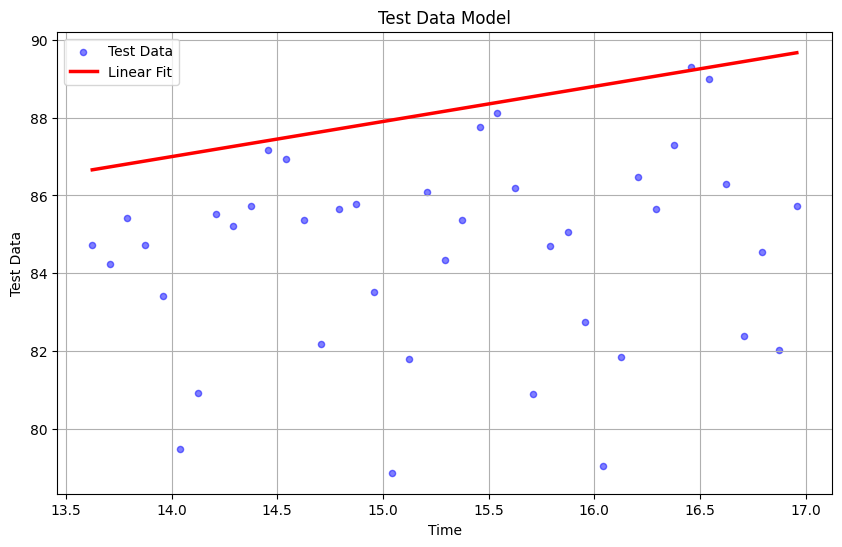

RMSE of linear model:4.403
MAPE of linear model:0.043 %


In [14]:

linear_test = model.predict(np.array(x_test).reshape(-1, 1))

# plotting using Matplotlib
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, s=20, c="blue", alpha=0.5, label="Test Data")
plt.plot(x_test, linear_test, color="red", linewidth=2.5, label="Linear Fit")
plt.xlabel('Time')
plt.ylabel('Test Data')
plt.title('Test Data Model')
plt.grid(True)
plt.legend()
plt.show()


# Calculate performance metrics for Linear Model
RMSE_linear = (mean_squared_error(y_test, linear_test ,squared=False))
MAPE_linear = mean_absolute_percentage_error(y_test, linear_test) 
print("RMSE of linear model:{:.3f}".format(RMSE_linear))
print("MAPE of linear model:{:.3f} %".format(MAPE_linear))

### Quadratic Trend

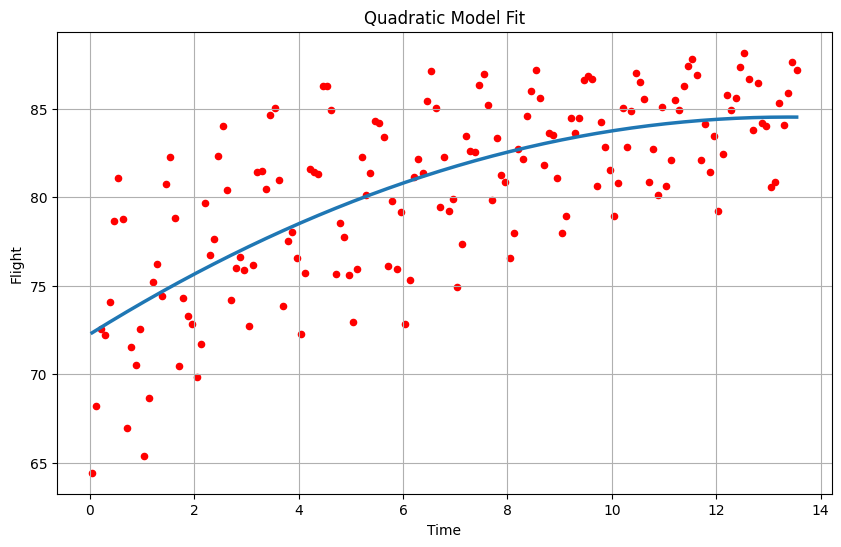

The quadratic model is F(t) = -0.068*t^2 + 1.832*t + 72.264


In [15]:
# Quadratic fit
degree = 2
model_2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_2.fit(np.array(x_train).reshape(-1, 1), y_train)
quadratic = model_2.predict(np.array(x_train).reshape(-1, 1))



# Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, s=20, c="red", label="Original Data")
plt.plot(x_train, quadratic, label="Quadratic Fit", linewidth=2.5)
plt.xlabel('Time')
plt.ylabel('Flight')
plt.title('Quadratic Model Fit')
plt.grid(True)
plt.show()

# Extract coefficients for quadratic model
coefficients_2 = model_2.named_steps['linearregression'].coef_
intercept_2 = model_2.named_steps['linearregression'].intercept_
print("The quadratic model is F(t) = {:.3f}*t^2 + {:.3f}*t + {:.3f}".format(coefficients_2[2], coefficients_2[1], intercept_2))



### Cubic Trend

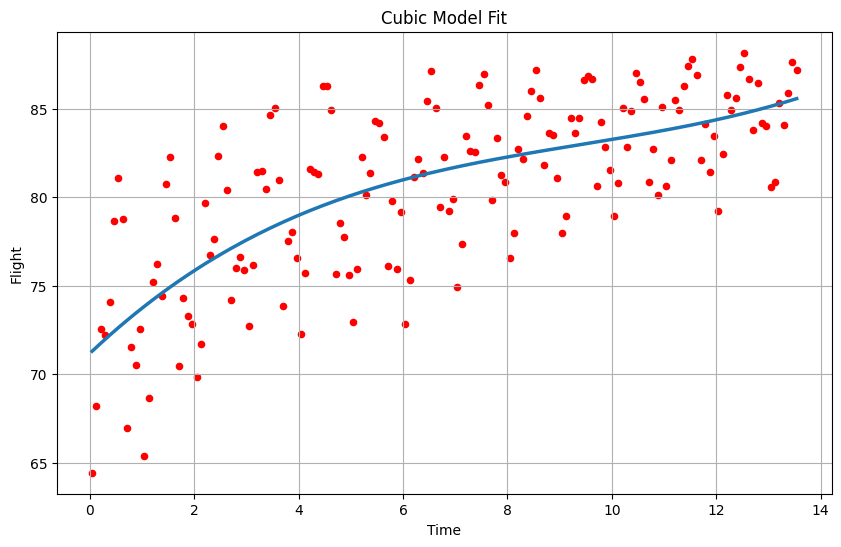

The cubic model is F(t) = 0.009*t^3 + -0.244*t^2 + 2.788*t + 71.182


In [16]:

# Cubic model fit
degree = 3
model_3 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_3.fit(np.array(x_train).reshape(-1, 1), y_train)
cubic = model_3.predict(np.array(x_train).reshape(-1, 1))


# plot using matplotlib
plt.figure(figsize=(10,6))
plt.scatter(x_train, y_train, s=20, c="red", label="Original Data")
plt.plot(x_train, cubic, linewidth=2.5)
plt.xlabel('Time')
plt.ylabel('Flight')
plt.title('Cubic Model Fit')
plt.grid(True)
plt.show()


coefficients_3 = model_3.named_steps['linearregression'].coef_
intercept_3 = model_3.named_steps['linearregression'].intercept_
print("The cubic model is F(t) = {:.3f}*t^3 + {:.3f}*t^2 + {:.3f}*t + {:.3f}".format(coefficients_3[3], coefficients_3[2], coefficients_3[1], intercept_3))




### Residual Quadratic and Cubic Model

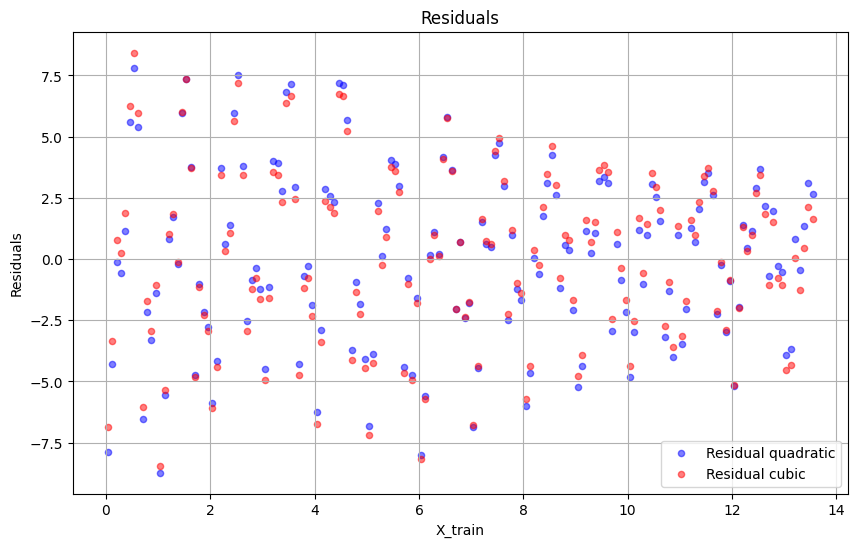

In [17]:
# Calculate residuals
residuals_quadratic = y_train - quadratic
residuals_cubic = y_train - cubic 

# Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x_train, residuals_quadratic, s=20, c="blue", label="Residual quadratic", alpha=0.5)
plt.scatter(x_train, residuals_cubic, s=20, c="red", label="Residual cubic", alpha=0.5)
plt.xlabel('X_train')
plt.ylabel('Residuals')
plt.legend(loc="lower right")
plt.title('Residuals')
plt.grid(True)
plt.show()


### Evaluate the Quadratic and Cubic Models

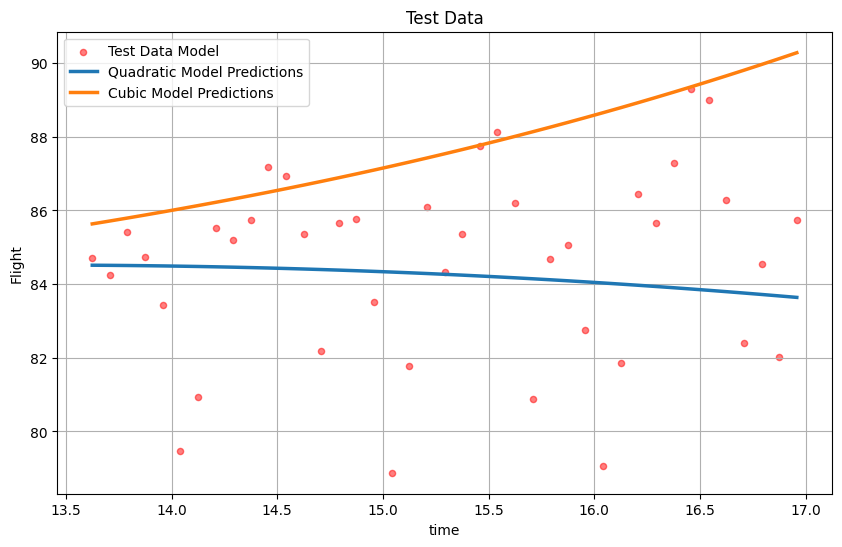

The RMSE of the quadratic model is 2.590
The MAPE of the quadratic model is 0.025 %

The RMSE of the cubic model is 4.120
The MAPE of the cubic model is 0.038 %


In [18]:
# fit Models on test Data 
quadratic_test = model_2.predict(np.array(x_test).reshape(-1, 1))
cubic_test = model_3.predict(np.array(x_test).reshape(-1, 1))

# Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, s=20, c="red", label="Test Data Model", alpha=0.5)
plt.plot(x_test, quadratic_test, label="Quadratic Model Predictions", linewidth=2.5)
plt.plot(x_test, cubic_test, label="Cubic Model Predictions", linewidth=2.5)
plt.xlabel('time')
plt.ylabel('Flight')
plt.legend(loc="upper left")
plt.title('Test Data')
plt.grid(True)
plt.show()

# Calculate performance metrics for quadratic Model
RMSE_Quadratic = mean_squared_error(y_test, quadratic_test ,squared=False)
MAPE_Quadratic = mean_absolute_percentage_error(y_test , quadratic_test)

# Calculate performance metrics for cubic Model
RMSE_Cubic = mean_squared_error(y_test, cubic_test ,squared=False)
MAPE_Cubic = mean_absolute_percentage_error(y_test , cubic_test)

# Display performance metrics
print("The RMSE of the quadratic model is {:.3f}".format(RMSE_Quadratic))
print("The MAPE of the quadratic model is {:.3f} %".format(MAPE_Quadratic))
print("\nThe RMSE of the cubic model is {:.3f}".format(RMSE_Cubic))
print("The MAPE of the cubic model is {:.3f} %".format(MAPE_Cubic))


### Conclusion

| Errors          | MAPE  |  RMSE |
|-----------------|-------|-------|
| Linear model    | 0.043 | 4.333 |
| Quadratic model | 0.025 | 2.590 |
| Cubic model     | 0.038 | 4.120 |

The performance metrics (MAPE and RMSE) were calculated for three different models: linear, quadratic, and cubic. Based on the provided errors, the quadratic model outperformed the other models, exhibiting the lowest errors
$$F(t_i) = -0.068*t^2 + 1.832*t + 72.26 $$


### Seasonal Component 

1-compute the diffrence (residuals) between the real data (y_train) and prediction (quadratic) for each month oF the years
$$R_i = Y_i - (F(t_i) + S_i)$$
2-Calculate the monthly mean values to gain insights into the periodic trends and better understand the overall pattern of the data across each month.

3-fit a cubic interpolation over the 12 points 

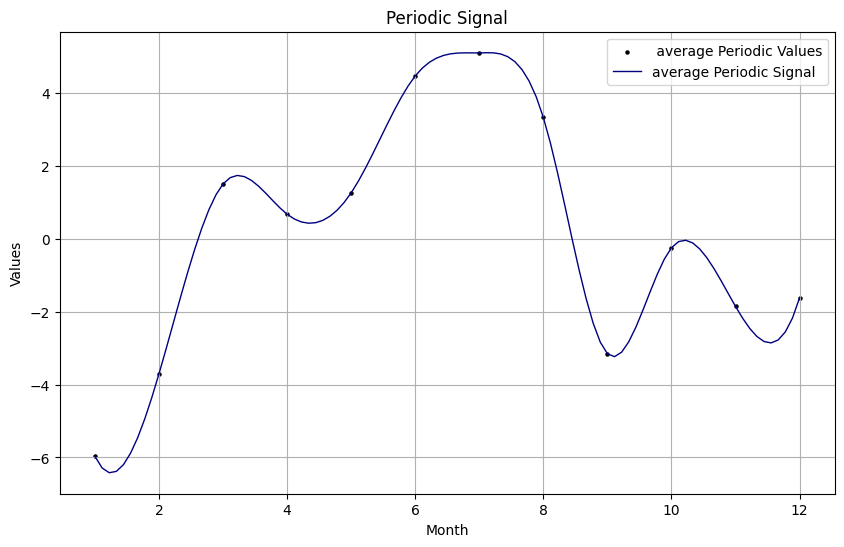

In [19]:
Dom_LF_train["Residual quadratic model"]  = y_train - quadratic

# Calculate monthly mean values
month_mean_residual = Dom_LF_train.groupby("Month")["Residual quadratic model"].mean()

# Generate continuous x values for smoother curve
month_signal = np.linspace(1, 12, num=100, endpoint=True)

# Cubic interpolation
periodic = interp1d(month_mean_residual.index, month_mean_residual.values, kind='cubic')

# Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(month_mean_residual.index, month_mean_residual.values, s=5, c="black", label=' average Periodic Values', alpha=1)
plt.plot(month_signal, periodic(month_signal), c="navy", linewidth=1, label='average Periodic Signal')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend(loc="upper right")
plt.title('Periodic Signal')
plt.grid(True)
plt.show()


In [20]:
periodic_train = list(chain.from_iterable(month_mean_residual[Dom_LF_train.Month].values[..., None])) 
periodic_test = list(chain.from_iterable(month_mean_residual[Dom_LF_test.Month].values[..., None])) 
periodic_future = list(chain.from_iterable(month_mean_residual[df[len(x):].Month].values[...,None]))

### Projected Domestic Flight Numbers 

In [21]:
x_future = np.array(df['time'][len(x):])
y_future = np.array(df['Dom_LF'][len(x):])

quadratic_future = model_2.predict(x_future.reshape(-1, 1))

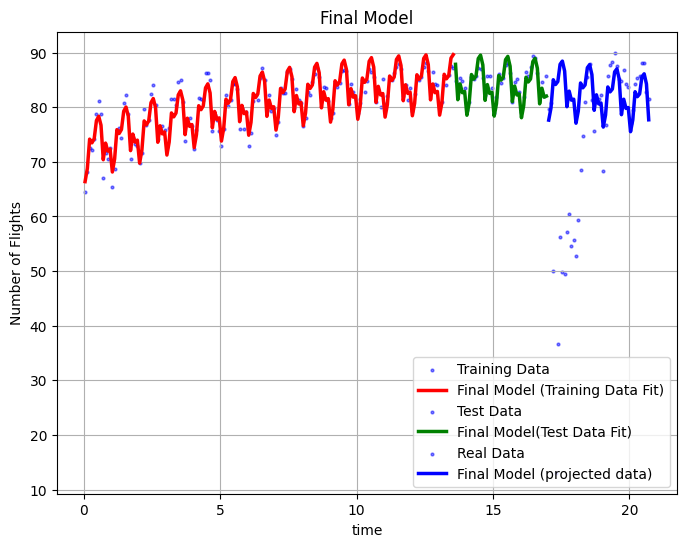

The RMSE of the final model is 1.560
The MAPE of the final model is 0.014 %


In [22]:
# Plotting using matplotlib
plt.figure(figsize=(8, 6))

# Training data
plt.scatter(x_train, y_train, s=4, c="blue", label="Training Data", alpha=0.5)
plt.plot(x_train, quadratic + periodic_train, c="red", linewidth=2.5, label="Final Model (Training Data Fit)")

# Test data
plt.scatter(x_test, y_test, s=4, c="blue", label="Test Data", alpha=0.5)
plt.plot(x_test, quadratic_test + periodic_test, c="green", linewidth=2.5, label="Final Model(Test Data Fit)")

#data after covid-19 lockdown
plt.scatter(x_future, y_future, s=4, c="blue", label="Real Data", alpha=0.5)
plt.plot(x_future, quadratic_future + periodic_future, c="blue", linewidth=2.5, label="Final Model (projected data)")

plt.xlabel('time')
plt.ylabel('Number of Flights')
plt.legend(loc="lower right")
plt.title('Final Model')
plt.grid(True)
plt.show()


# Calculate performance metrics for final Model
RMSE_final = mean_squared_error(y_test, quadratic_test + periodic_test  ,squared=False)
MAPE_final = mean_absolute_percentage_error(y_test , quadratic_test + periodic_test)

# Display performance metrics
print("The RMSE of the final model is {:.3f}".format(RMSE_final))
print("The MAPE of the final model is {:.3f} %".format(MAPE_final))



**interpretation**: after adding the seasonal component the error drops significantly our model now contain all the tree components 

| Errors          | MAPE  |  RMSE |
|-----------------|-------|-------|
| Final model     | 0.014 | 1.560 |
| Quadratic model | 0.025 | 2.590 |


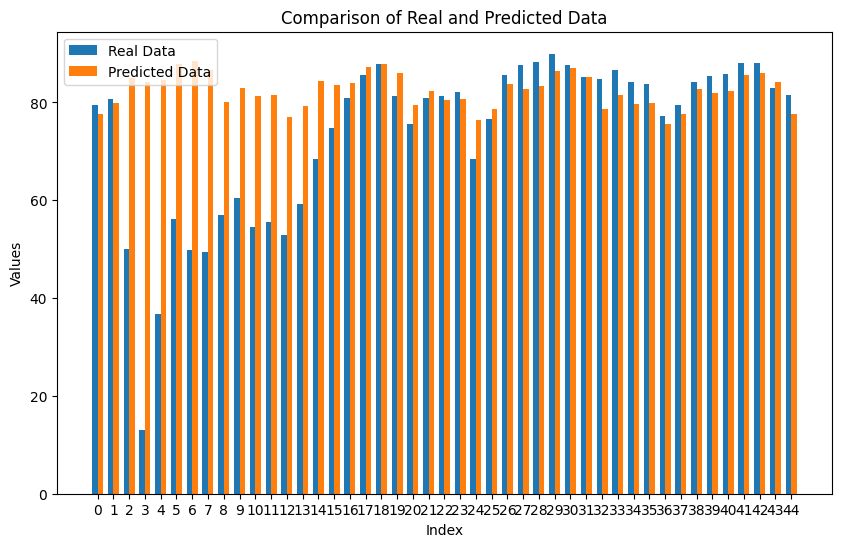

In [23]:
# Plotting the side-by-side bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.35  
bar_positions_real = range(len(y_future))
bar_positions_predicted = [pos + bar_width for pos in bar_positions_real]

plt.bar(bar_positions_real, y_future, width=bar_width, label='Real Data')
plt.bar(bar_positions_predicted, quadratic_future + periodic_future, width=bar_width, label='Predicted Data')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Real and Predicted Data')
# Use a subset of indices for x-axis ticks
subset_indices = list(df.index)[:len(bar_positions_real)]
plt.xticks([pos + bar_width / 2 for pos in bar_positions_real], subset_indices)
plt.legend()
plt.show()


In [24]:
# Calculate domestic Flight loss
loss_df = df[len(x):].assign(domestic_Flight_loss_gain=lambda x: (quadratic_future + periodic_future) - y_future)

# Calculate predicted values
loss_df['predicted_values'] = quadratic_future + periodic_future

# Select relevant columns
result_df = loss_df[['date', 'Dom_LF', 'predicted_values','domestic_Flight_loss_gain']]

result_df


,date,Dom_LF,predicted_values,domestic_Flight_loss_gain
204,2020-01-01,79.57,77.626765,-1.943235
205,2020-02-01,80.79,79.856950,-0.933050
206,2020-03-01,50.07,85.013563,34.943563
207,2020-04-01,13.09,84.137319,71.047319
208,2020-05-01,36.70,84.680362,47.980362
209,2020-06-01,56.16,87.839118,31.679118
210,2020-07-01,49.80,88.422874,38.622874
211,2020-08-01,49.41,86.604895,37.194895
212,2020-09-01,57.06,80.078605,23.018605
213,2020-10-01,60.47,82.932316,22.462316


### 

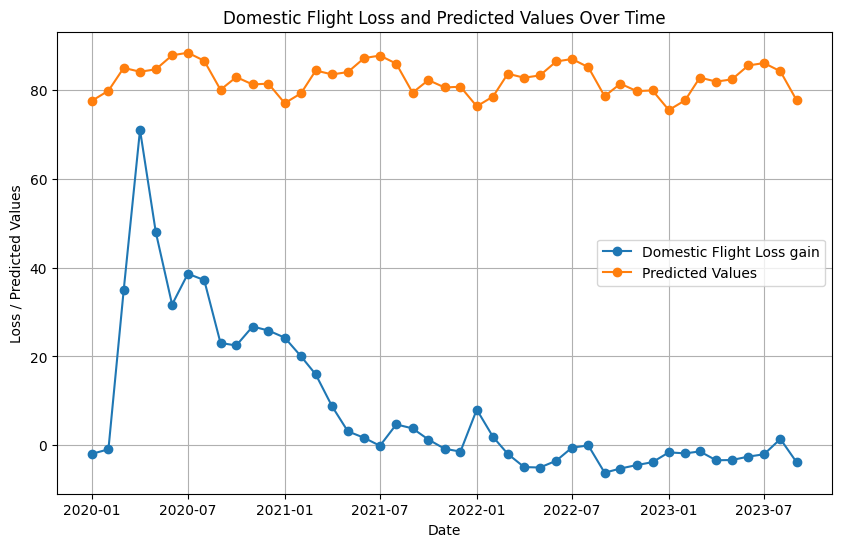

total loss until september 2023 is 392.84273830246667


In [25]:

# Plotting the loss and predicted values over time
plt.figure(figsize=(10, 6))
plt.plot(loss_df['date'], loss_df['domestic_Flight_loss_gain'], label='Domestic Flight Loss gain', marker='o')
plt.plot(loss_df['date'], loss_df['predicted_values'], label='Predicted Values', marker='o')
plt.xlabel('Date')
plt.ylabel('Loss / Predicted Values')
plt.title('Domestic Flight Loss and Predicted Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

print(f"total loss until september 2023 is {result_df['domestic_Flight_loss_gain'].sum()}")

In [26]:
# Calculate the monthly recovery rate
total_losses = result_df[result_df['domestic_Flight_loss_gain']> 0]['domestic_Flight_loss_gain'].sum() 
recovered_losses = abs(result_df[result_df['domestic_Flight_loss_gain']< 0]['domestic_Flight_loss_gain'].sum())
number_of_months = len(result_df)

monthly_recovery_rate = ((recovered_losses / total_losses) ** (1 / number_of_months)) - 1


print(f"The monthly recovery rate is: {monthly_recovery_rate:.2%}")


The monthly recovery rate is: -4.35%
